# A Simple Scikit-Learn Regression Workflow

This notebook shows a brief workflow you might use with `scikit-learn` to build a machine learning model to **predict medical insurance charges** for a patient.

Dataset source: [Medical Cost Personal Datasets](https://github.com/stedy/Machine-Learning-with-R-datasets) — originally from the book *Machine Learning with R* by Brett Lantz.

It follows the same structure as the classification workflow:
1. Get the data ready
2. Choose the model/estimator
3. Fit the model to the data and use it to make a prediction
4. Evaluate the model
5. Experiment to improve (hyperparameter tuning)
6. Save a model for later use

**Note:** This workflow assumes your data is ready to be used with machine learning models (is numerical, has no missing values). We'll encode categorical columns as part of step 1.

In [1]:
# Standard imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Get the data ready

In [2]:
# Import dataset directly from GitHub
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)

# View the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check the shape and data types
print(f"Shape: {insurance.shape}")
insurance.dtypes

Shape: (1338, 7)


age           int64
sex             str
bmi         float64
children      int64
smoker          str
region          str
charges     float64
dtype: object

In [4]:
insurance.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


The dataset has 1,338 rows and 7 columns:
- `age` – age of the primary beneficiary
- `sex` – gender of the insurance contractor (female / male)
- `bmi` – body mass index
- `children` – number of children covered by health insurance
- `smoker` – whether the beneficiary smokes (yes / no)
- `region` – beneficiary's residential area in the US
- `charges` – **target**: individual medical costs billed by insurance

The categorical columns (`sex`, `smoker`, `region`) must be encoded as numbers before passing them to the model.

In [5]:
# help(pd.get_dummies)

In [6]:
# Encode categorical columns with pd.get_dummies (one-hot encoding)
insurance_encoded = pd.get_dummies(insurance, columns=["sex", "smoker", "region"])
insurance_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [7]:
# Create X (all feature columns) and y (the target column)
X = insurance_encoded.drop("charges", axis=1)
y = insurance_encoded["charges"]

print(f"Features shape: {X.shape}")
print(f"Target shape:   {y.shape}")

Features shape: (1338, 11)
Target shape:   (1338,)


In [8]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# View the data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

## 2. Choose the model/estimator

You can do this using the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

In Scikit-Learn, machine learning models are referred to as **estimators**.

Since we're working on a **regression** problem (predicting a continuous value — insurance charges), we choose `LinearRegression` from the `linear_model` module.

`LinearRegression` fits a linear equation to the data by finding the coefficients that minimise the sum of squared errors between predictions and actual values. It is a natural starting point — fast, interpretable, and easy to diagnose.

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 3. Fit the model to the data and use it to make a prediction

A model will (attempt to) learn the patterns in a dataset by calling the `fit()` function on it and passing it the data.

In [10]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
# Check model information after fitting
print(f"Intercept:          ${model.intercept_:,.2f}")
print(f"Number of features: {model.n_features_in_}")
print()
# Pair each feature name with its coefficient
coef_df = pd.DataFrame({
    "feature":     model.feature_names_in_,
    "coefficient": model.coef_
}).sort_values("coefficient", ascending=False).reset_index(drop=True)

coef_df

Intercept:          $-574.54
Number of features: 11



,feature,coefficient
0,smoker_yes,11825.564428
1,region_northeast,459.585244
2,children,425.278784
3,bmi,337.092552
4,age,256.975706
5,region_northwest,88.907918
6,sex_female,9.295846
7,sex_male,-9.295846
8,region_southeast,-198.279052
9,region_southwest,-350.214110


Once a model has learned patterns in data, you can use them to make a prediction with the `predict()` function.

In [12]:
# Make predictions on the test set
y_preds = model.predict(X_test)
y_preds[:10]

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352])

In [13]:
# Compare predictions vs actual values for the first 10 samples
comparison = pd.DataFrame({"Actual": y_test.values[:10],
                            "Predicted": y_preds[:10]})
comparison["Difference"] = (comparison["Predicted"] - comparison["Actual"]).round(2)
comparison.round(2)

,Actual,Predicted,Difference
0,9095.07,8969.55,-125.52
1,5272.18,7068.75,1796.57
2,29330.98,36858.41,7527.43
3,9301.89,9454.68,152.78
4,33750.29,26973.17,-6777.12
5,4536.26,10864.11,6327.85
6,2117.34,170.28,-1947.06
7,14210.54,16903.45,2692.91
8,3732.63,1092.43,-2640.19
9,10264.44,11218.34,953.90


## 4. Evaluate the model

For regression problems we use different metrics than classification accuracy:
- **MAE** (Mean Absolute Error) – average absolute difference between predicted and actual values, in original units
- **RMSE** (Root Mean Squared Error) – square root of the average squared error; penalises large errors more than MAE
- **R²** (Coefficient of Determination) – how much variance in the target the model explains (1.0 = perfect)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate on the training set
train_preds = model.predict(X_train)
print("--- Training Set ---")
print(f"MAE:  ${mean_absolute_error(y_train, train_preds):,.2f}")
print(f"RMSE: ${mean_squared_error(y_train, train_preds) ** 0.5:,.2f}")
print(f"R²:   {r2_score(y_train, train_preds):.4f}")

--- Training Set ---
MAE:  $4,208.23
RMSE: $6,105.55
R²:   0.7417


In [15]:
# Evaluate on the test set (unseen data)
print("--- Test Set ---")
print(f"MAE:  ${mean_absolute_error(y_test, y_preds):,.2f}")
print(f"RMSE: ${mean_squared_error(y_test, y_preds) ** 0.5:,.2f}")
print(f"R²:   {r2_score(y_test, y_preds):.4f}")

--- Test Set ---
MAE:  $4,181.19
RMSE: $5,796.28
R²:   0.7836


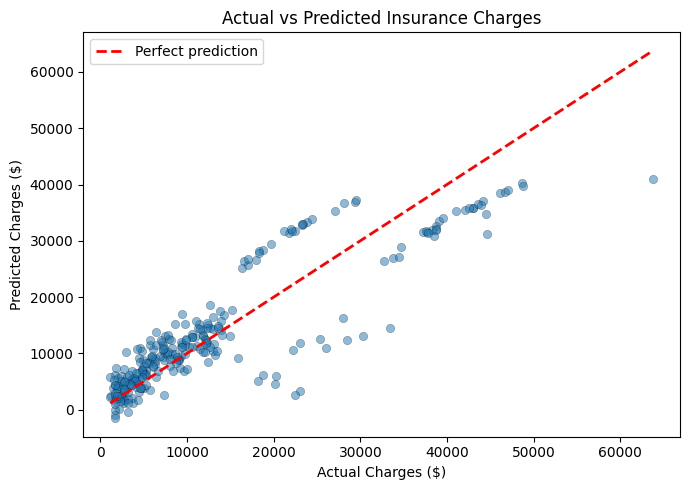

In [16]:
# Visualise predictions vs actuals
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_preds, alpha=0.5, edgecolors='k', linewidths=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect prediction')
plt.xlabel("Actual Charges ($)")
plt.ylabel("Predicted Charges ($)")
plt.title("Actual vs Predicted Insurance Charges")
plt.legend()
plt.tight_layout()
plt.show()

## 5. Experiment to improve (hyperparameter tuning)

`LinearRegression` has no hyperparameters to tune, but we can experiment by comparing it against **regularised** variants:

- **Ridge** (L2 regularisation) – shrinks all coefficients towards zero; controlled by `alpha`
- **Lasso** (L1 regularisation) – can shrink some coefficients *to exactly* zero (feature selection); controlled by `alpha`

A higher `alpha` means stronger regularisation. We'll try a range of `alpha` values and compare MAE and R² for each.

In [17]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

alphas = [0.01, 0.1, 1, 10, 100, 1000]
results = []

for alpha in alphas:
    for name, ModelClass in [("Ridge", Ridge), ("Lasso", Lasso)]:
        m = ModelClass(alpha=alpha).fit(X_train, y_train)
        preds = m.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        r2  = r2_score(y_test, preds)
        results.append({"model": name, "alpha": alpha, "MAE": mae, "R2": r2})
        print(f"{name}(alpha={alpha:>6}) — MAE: ${mae:,.2f}  |  R²: {r2:.4f}")

results_df = pd.DataFrame(results)

Ridge(alpha=  0.01) — MAE: $4,181.26  |  R²: 0.7836
Lasso(alpha=  0.01) — MAE: $4,181.20  |  R²: 0.7836
Ridge(alpha=   0.1) — MAE: $4,181.80  |  R²: 0.7836
Lasso(alpha=   0.1) — MAE: $4,181.25  |  R²: 0.7836
Ridge(alpha=     1) — MAE: $4,187.30  |  R²: 0.7834
Lasso(alpha=     1) — MAE: $4,182.30  |  R²: 0.7835
Ridge(alpha=    10) — MAE: $4,241.81  |  R²: 0.7817
Lasso(alpha=    10) — MAE: $4,191.37  |  R²: 0.7830
Ridge(alpha=   100) — MAE: $4,748.16  |  R²: 0.7439
Lasso(alpha=   100) — MAE: $4,265.29  |  R²: 0.7796
Ridge(alpha=  1000) — MAE: $7,336.54  |  R²: 0.4300
Lasso(alpha=  1000) — MAE: $4,880.71  |  R²: 0.7282


**Note:** It's best practice to test different hyperparameters with a validation set or cross-validation.

In [18]:
from sklearn.model_selection import cross_val_score

# Cross-validate LinearRegression, Ridge, and Lasso
np.random.seed(42)
for name, m in [("LinearRegression", LinearRegression()),
                ("Ridge(alpha=1)",   Ridge(alpha=1)),
                ("Lasso(alpha=1)",   Lasso(alpha=1))]:
    cv_scores = -cross_val_score(m, X, y, cv=5, scoring="neg_mean_absolute_error")
    print(f"{name}")
    print(f"  Cross-val MAE: ${np.mean(cv_scores):,.2f} (+/- ${np.std(cv_scores):,.2f})\n")

LinearRegression
  Cross-val MAE: $4,197.72 (+/- $92.30)

Ridge(alpha=1)
  Cross-val MAE: $4,202.55 (+/- $91.19)

Lasso(alpha=1)
  Cross-val MAE: $4,198.01 (+/- $92.15)



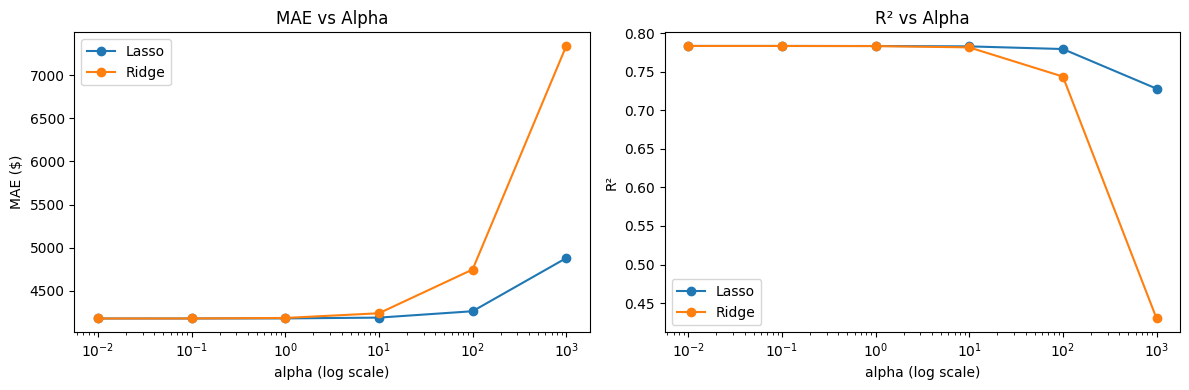

In [19]:
# Plot alpha vs MAE and R² for Ridge and Lasso
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for name, grp in results_df.groupby("model"):
    axes[0].plot(grp["alpha"], grp["MAE"], marker='o', label=name)
    axes[1].plot(grp["alpha"], grp["R2"],  marker='o', label=name)

for ax in axes:
    ax.set_xscale("log")
    ax.set_xlabel("alpha (log scale)")
    ax.legend()

axes[0].set_ylabel("MAE ($)")
axes[0].set_title("MAE vs Alpha")
axes[1].set_ylabel("R²")
axes[1].set_title("R² vs Alpha")

plt.tight_layout()
plt.show()

## 6. Save a model for later use

A trained model can be exported and saved so it can be imported and used later. One way to save a model is using Python's `pickle` module.

In [20]:
import pickle

# Save the LinearRegression model to file
best_model = LinearRegression().fit(X_train, y_train)
pickle.dump(best_model, open("linear_regression_insurance.pkl", "wb"))
print("Model saved.")

Model saved.


In [21]:
# Load a saved model and make a prediction on a single example
loaded_model = pickle.load(open("linear_regression_insurance.pkl", "rb"))

single_sample = np.array(X_test.iloc[0]).reshape(1, -1)
print(f"Loaded model prediction: ${loaded_model.predict(single_sample)[0]:,.2f}")
print(f"Actual value:            ${y_test.iloc[0]:,.2f}")

Loaded model prediction: $8,969.55
Actual value:            $9,095.07


C:\00code\Course\Data\project\MachineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
